In [1]:
# Imp libs:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Spliting data
from sklearn.model_selection import train_test_split,GridSearchCV

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Removing warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
file_loc = 'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv'
df = pd.read_csv(file_loc)

In [3]:
print('First 10 rows')
df.head(10)

First 10 rows


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
print('Last 10 rows')
df.tail(10)

Last 10 rows


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
null_data = df.isnull().sum()
null_data.sort_values(ascending=0)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df[df.isna().any(axis=1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
597,LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [10]:
df.dropna(axis=0,inplace=True)

In [11]:
desc = df.describe().T
desc['range']=desc['max']-desc['min']
desc

,count,mean,std,min,25%,50%,75%,max,range
ApplicantIncome,480.0,5364.231250,5668.251251,150.0,2898.75,3859.0,5852.50,81000.0,80850.0
CoapplicantIncome,480.0,1581.093583,2617.692267,0.0,0.00,1084.5,2253.25,33837.0,33837.0
LoanAmount,480.0,144.735417,80.508164,9.0,100.00,128.0,170.00,600.0,591.0
Loan_Amount_Term,480.0,342.050000,65.212401,36.0,360.00,360.0,360.00,480.0,444.0
Credit_History,480.0,0.854167,0.353307,0.0,1.00,1.0,1.00,1.0,1.0


In [12]:
df.describe(include='object').T

,count,unique,top,freq
Loan_ID,480,480,LP001003,1
Gender,480,2,Male,394
Married,480,2,Yes,311
Dependents,480,4,0,274
Education,480,2,Graduate,383
Self_Employed,480,2,No,414
Property_Area,480,3,Semiurban,191
Loan_Status,480,2,Y,332


In [13]:
desc[['min','mean','max','range']]

,min,mean,max,range
ApplicantIncome,150.0,5364.231250,81000.0,80850.0
CoapplicantIncome,0.0,1581.093583,33837.0,33837.0
LoanAmount,9.0,144.735417,600.0,591.0
Loan_Amount_Term,36.0,342.050000,480.0,444.0
Credit_History,0.0,0.854167,1.0,1.0


In [14]:
cont_data = df.select_dtypes(include=['int64','float64'])

cat_data= df.select_dtypes(include=['object'])

cont_columns = cont_data.columns

cat_columns = cat_data.columns

In [15]:
cont_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [16]:
cat_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
from scipy import stats

for i in cat_columns:
    print('For',i,', most frequent value is: ',stats.mode(df[i]),'\n')

For Loan_ID , most frequent value is:  ModeResult(mode=array(['LP001003'], dtype=object), count=array([1])) 

For Gender , most frequent value is:  ModeResult(mode=array(['Male'], dtype=object), count=array([394])) 

For Married , most frequent value is:  ModeResult(mode=array(['Yes'], dtype=object), count=array([311])) 

For Dependents , most frequent value is:  ModeResult(mode=array(['0'], dtype=object), count=array([274])) 

For Education , most frequent value is:  ModeResult(mode=array(['Graduate'], dtype=object), count=array([383])) 

For Self_Employed , most frequent value is:  ModeResult(mode=array(['No'], dtype=object), count=array([414])) 

For Property_Area , most frequent value is:  ModeResult(mode=array(['Semiurban'], dtype=object), count=array([191])) 

For Loan_Status , most frequent value is:  ModeResult(mode=array(['Y'], dtype=object), count=array([332])) 



In [18]:
for i in cat_columns:
    print('For column',i,'unique values are: ',df[i].unique())
    print('For column',i,'count of unique values are: ',df[i].nunique(),'\n\n')
    

For column Loan_ID unique values are:  ['LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011' 'LP001013'
 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001028' 'LP001029'
 'LP001030' 'LP001032' 'LP001036' 'LP001038' 'LP001043' 'LP001046'
 'LP001047' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001095'
 'LP001097' 'LP001098' 'LP001100' 'LP001112' 'LP001114' 'LP001116'
 'LP001119' 'LP001120' 'LP001131' 'LP001138' 'LP001144' 'LP001146'
 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179' 'LP001186'
 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199' 'LP001205'
 'LP001206' 'LP001207' 'LP001222' 'LP001225' 'LP001228' 'LP001233'
 'LP001238' 'LP001241' 'LP001243' 'LP001245' 'LP001248' 'LP001253'
 'LP001255' 'LP001256' 'LP001259' 'LP001263' 'LP001265' 'LP001267'
 'LP001275' 'LP001279' 'LP001282' 'LP001289' 'LP001310' 'LP001316'
 'LP001318' 'LP001319' 'LP001322' 'LP001325' 'LP001327' 'LP001333'
 'LP001334' 'LP001343' 'LP001345' 'LP001349' 'LP001367' 'LP001369'
 'LP001379' 'LP001384' 

In [19]:
for i in cat_columns:
    print('For column --',i,'-- value counts are: \n',df[i].value_counts(),'\n\n')

For column -- Loan_ID -- value counts are: 
 LP001003    1
LP001005    1
LP002347    1
LP002345    1
LP002342    1
           ..
LP001674    1
LP001673    1
LP001666    1
LP001665    1
LP002990    1
Name: Loan_ID, Length: 480, dtype: int64 


For column -- Gender -- value counts are: 
 Male      394
Female     86
Name: Gender, dtype: int64 


For column -- Married -- value counts are: 
 Yes    311
No     169
Name: Married, dtype: int64 


For column -- Dependents -- value counts are: 
 0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64 


For column -- Education -- value counts are: 
 Graduate        383
Not Graduate     97
Name: Education, dtype: int64 


For column -- Self_Employed -- value counts are: 
 No     414
Yes     66
Name: Self_Employed, dtype: int64 


For column -- Property_Area -- value counts are: 
 Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64 


For column -- Loan_Status -- value counts are: 
 Y    332
N    148

In [20]:
df.duplicated().sum()

0

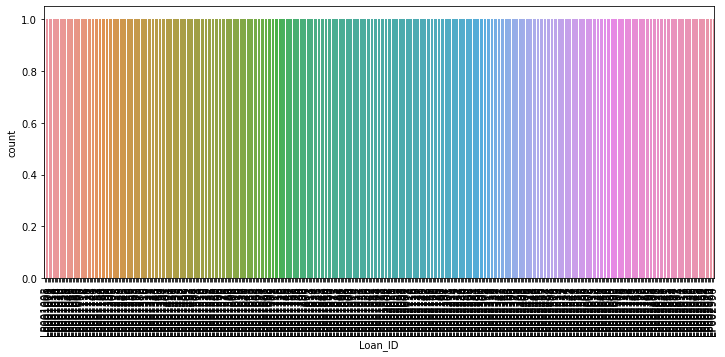

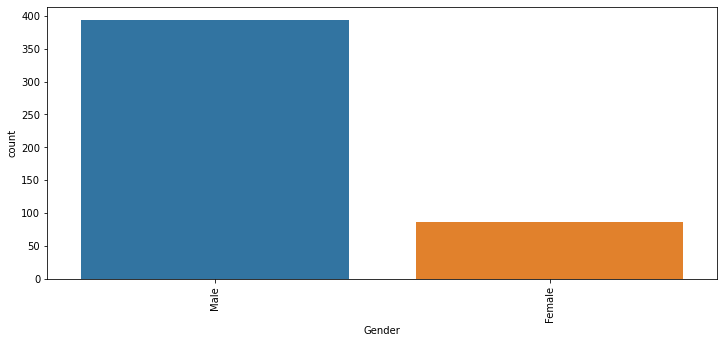

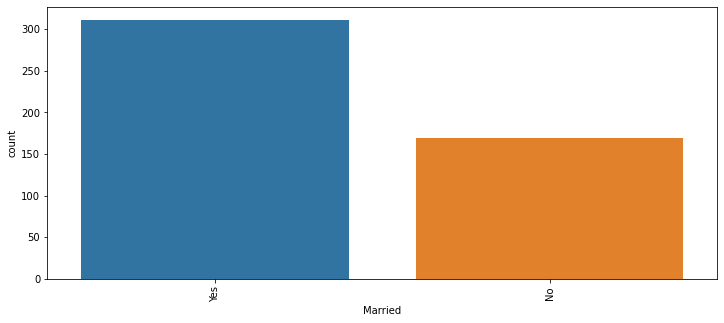

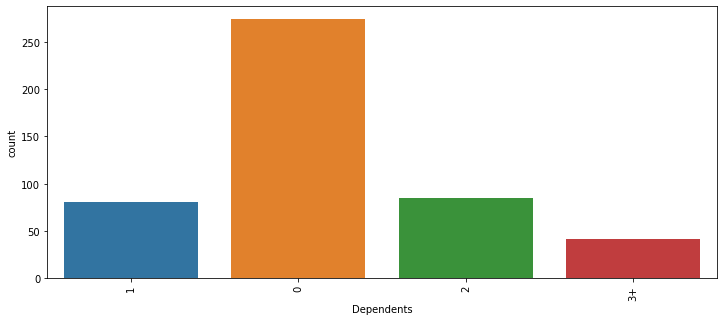

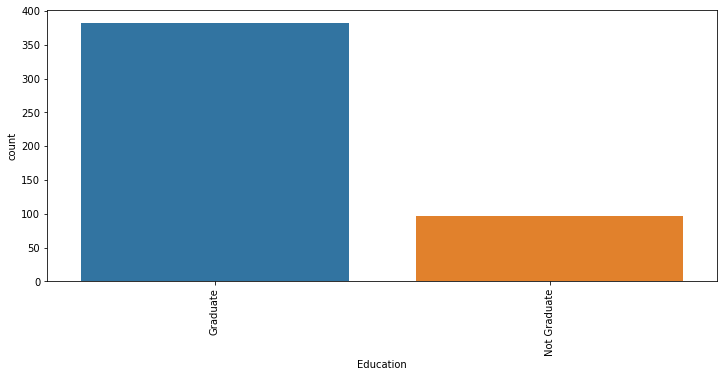

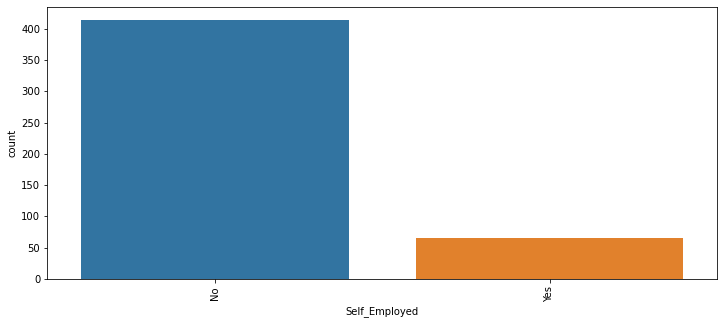

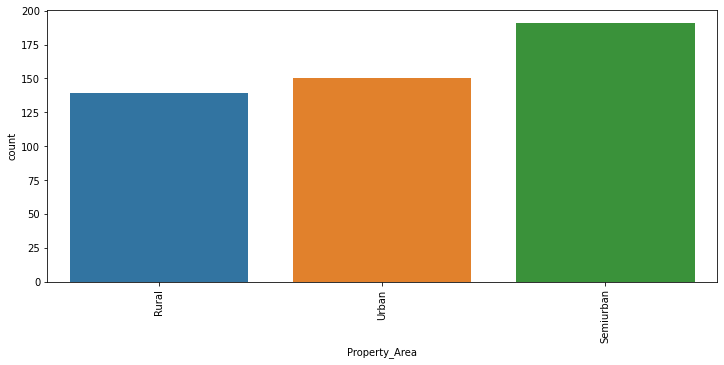

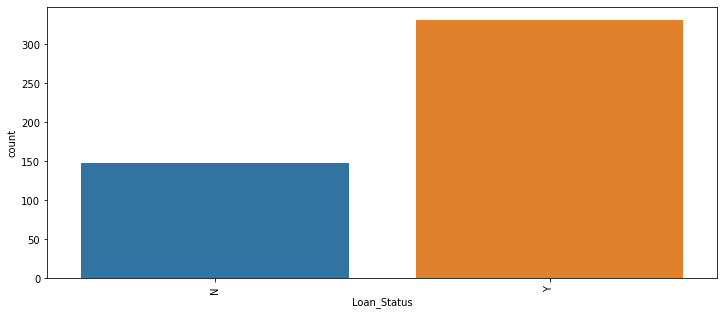

In [21]:
# Univariate analysis:

# COUNTPLOT

for i in cat_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.countplot(x=df[i],data=df)
    plt.xticks(rotation=90)

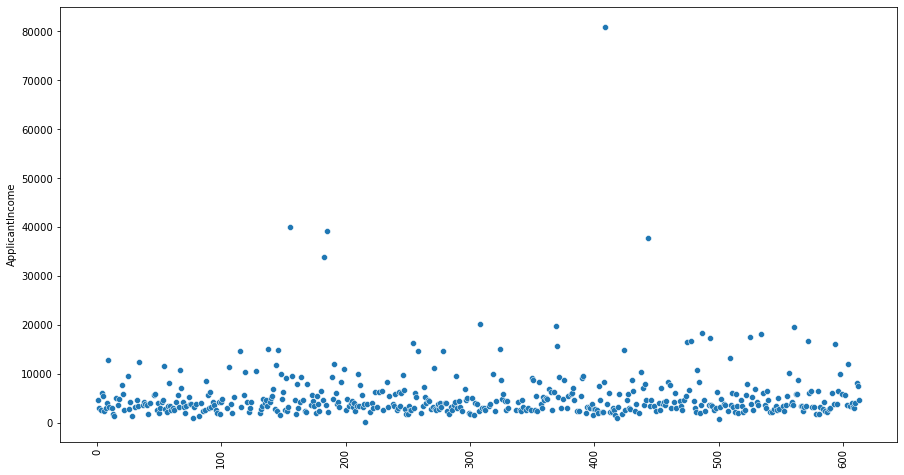

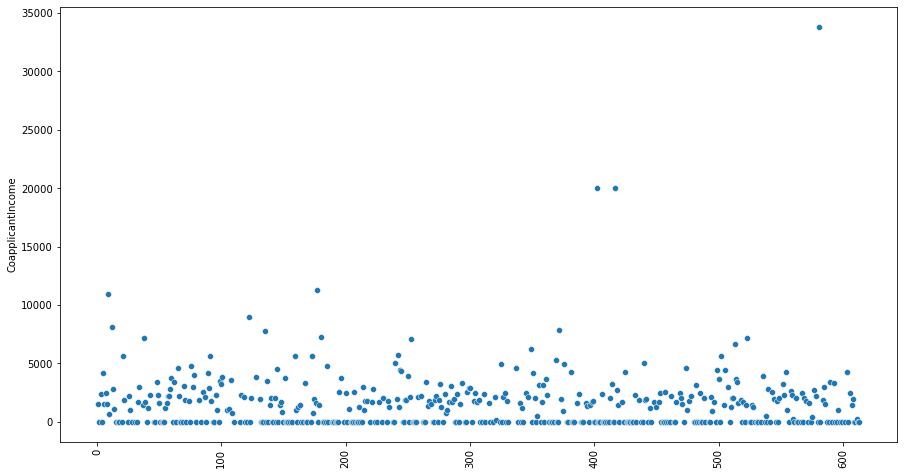

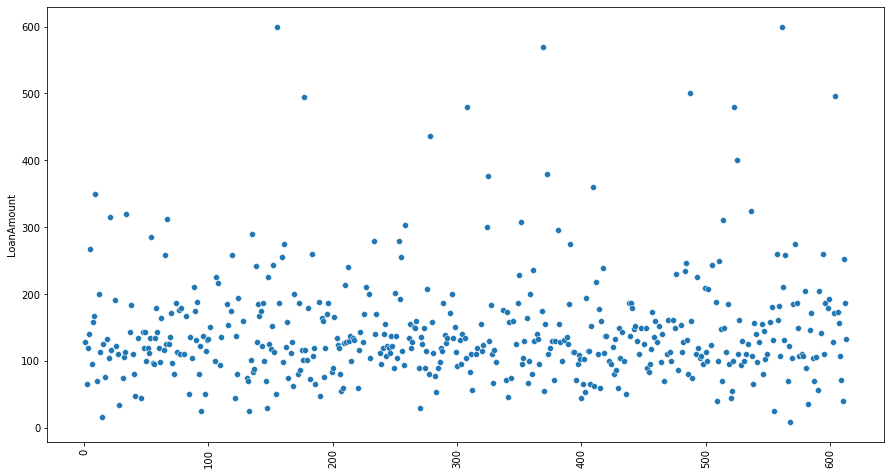

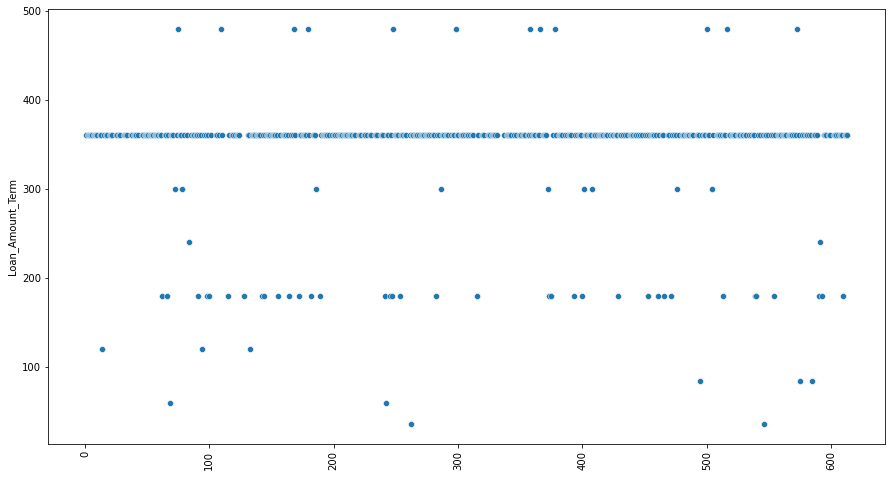

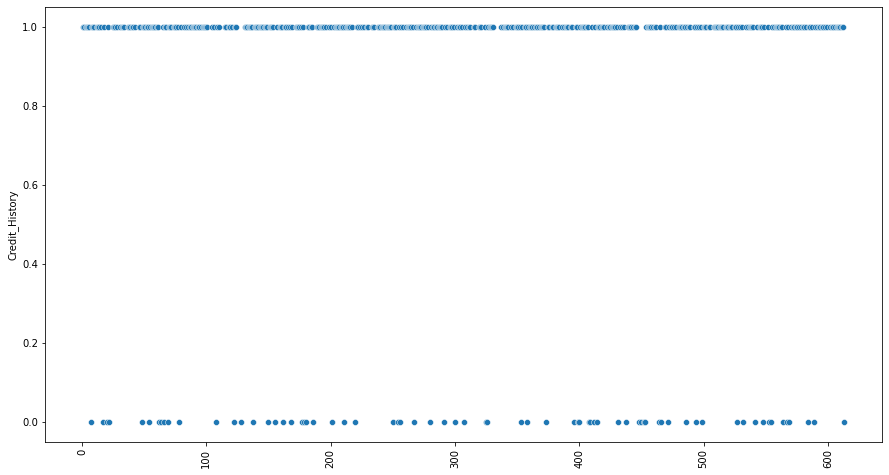

In [22]:
# Scatterplot

for i in cont_columns:
    f= plt.figure(figsize=(15,8))
    ax = sns.scatterplot(x=df.index,y=i,data=df)
    plt.xticks(rotation=90)
    plt.show()

In [23]:
cont_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [24]:
cat_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
# Lineplots

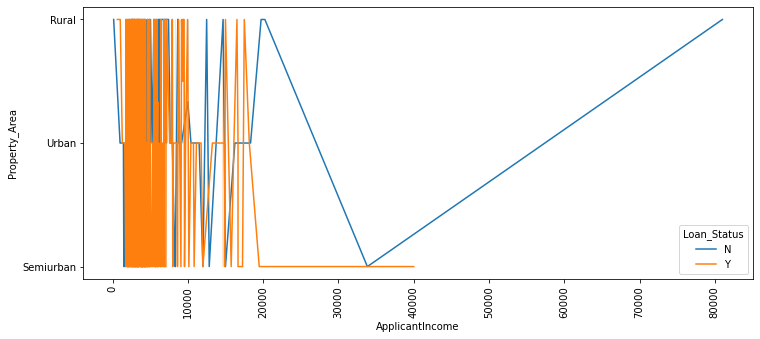

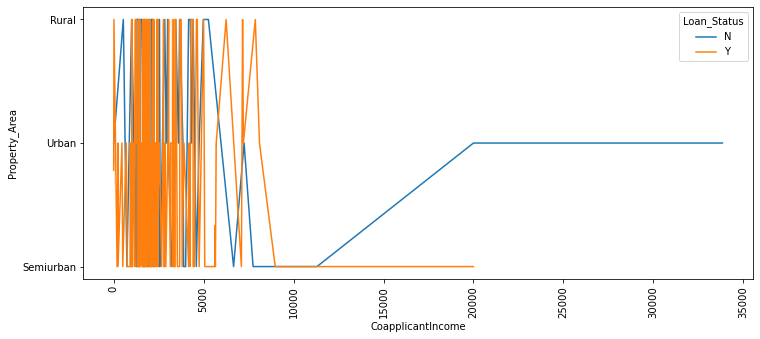

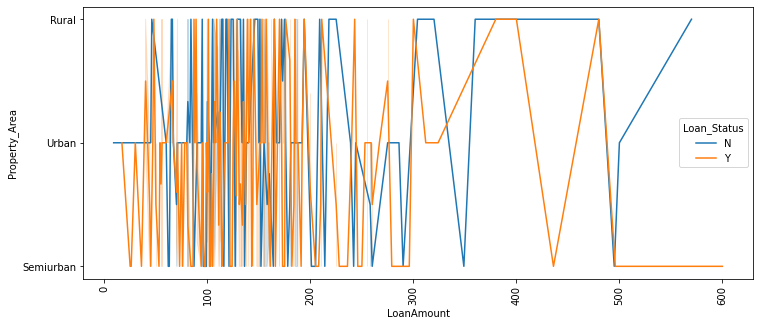

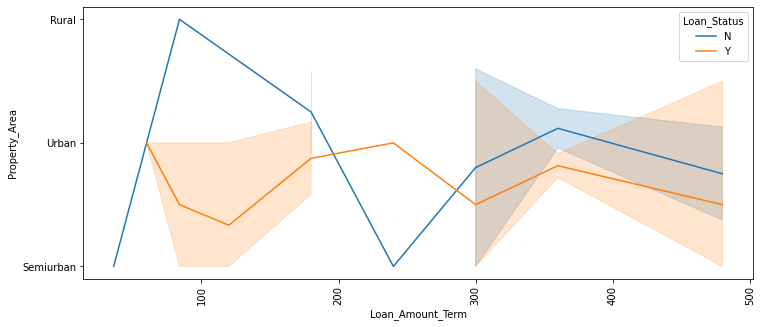

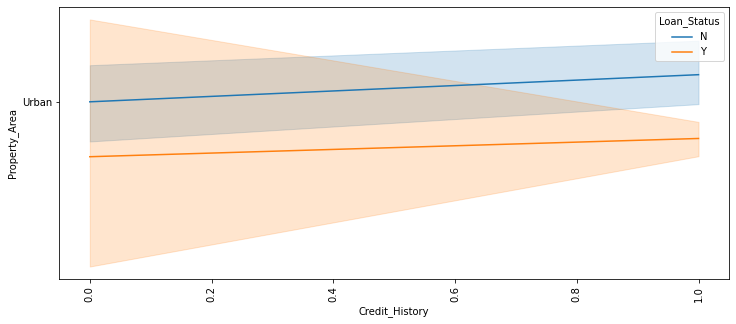

In [26]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.lineplot(x=i,y='Property_Area',data=df,hue='Loan_Status')
    plt.xticks(rotation=90)
    plt.show()

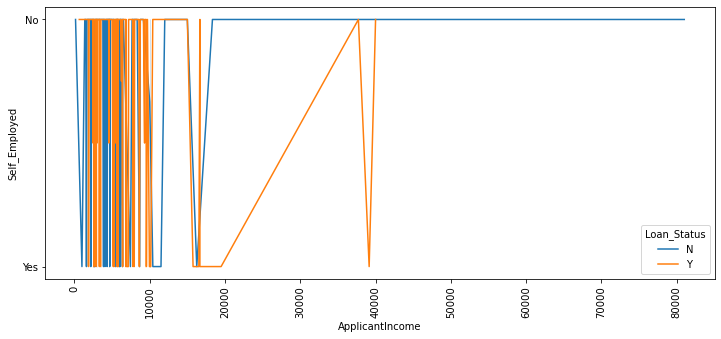

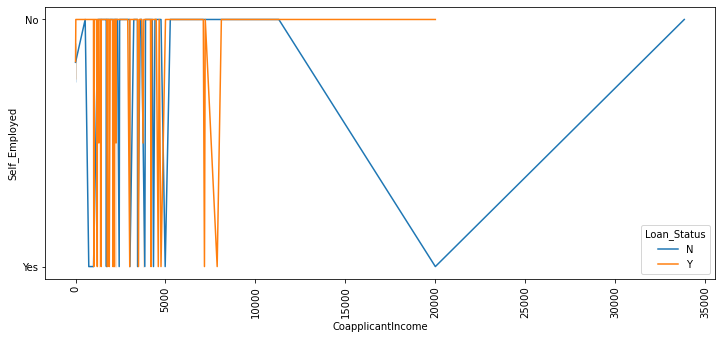

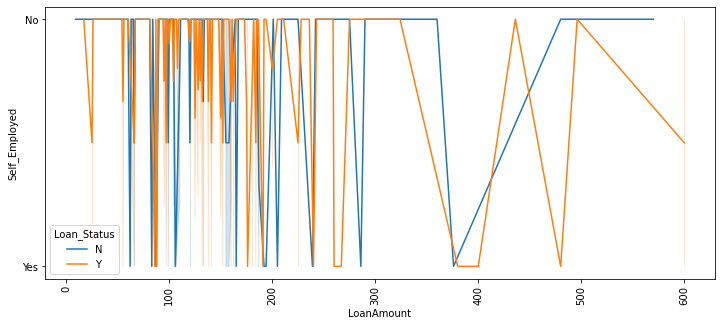

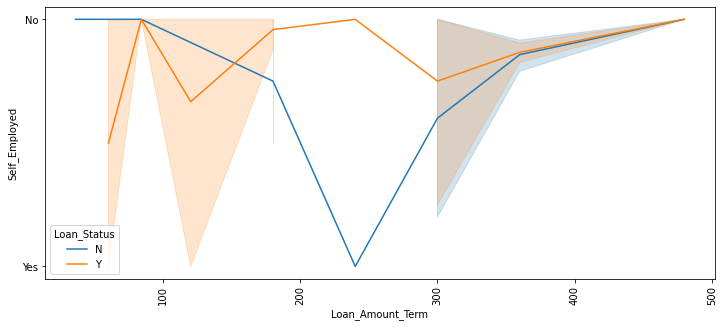

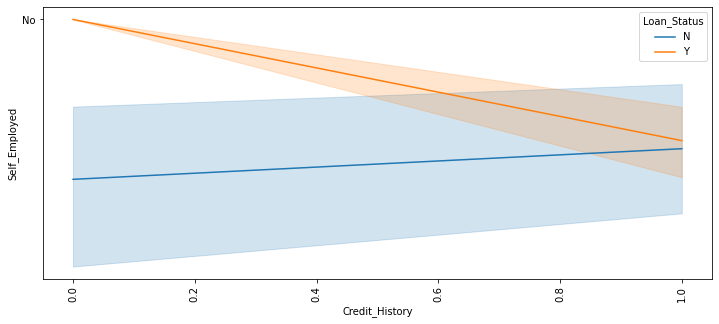

In [27]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.lineplot(x=i,y='Self_Employed',data=df,hue='Loan_Status')
    plt.xticks(rotation=90)
    plt.show()

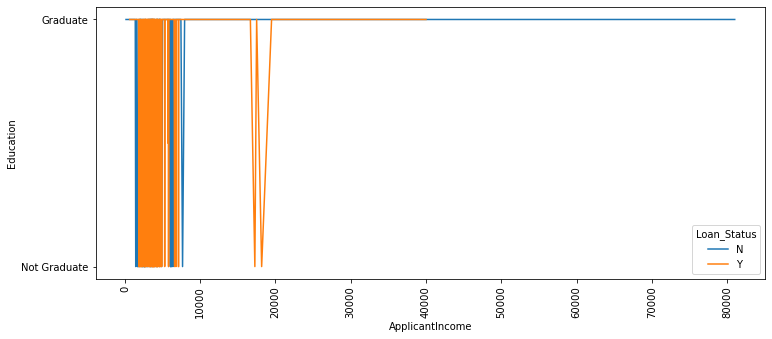

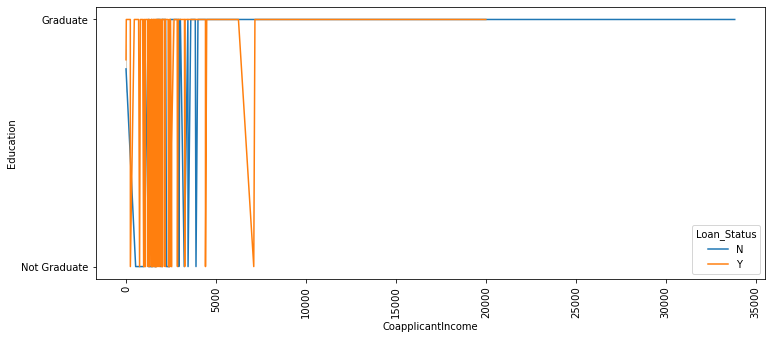

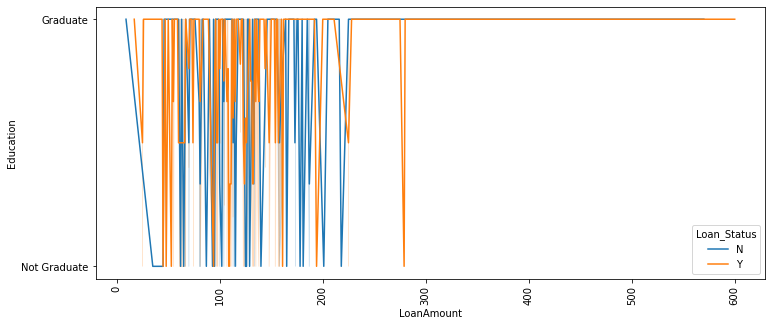

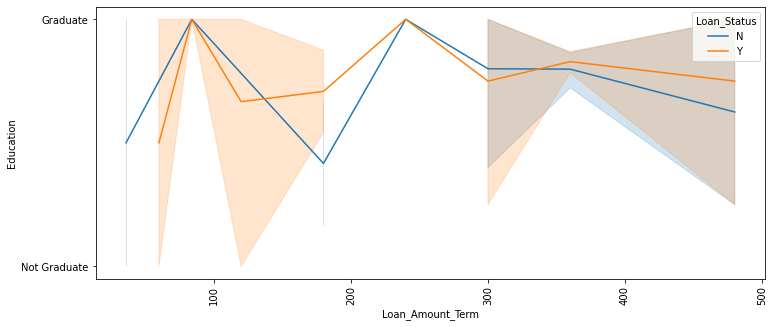

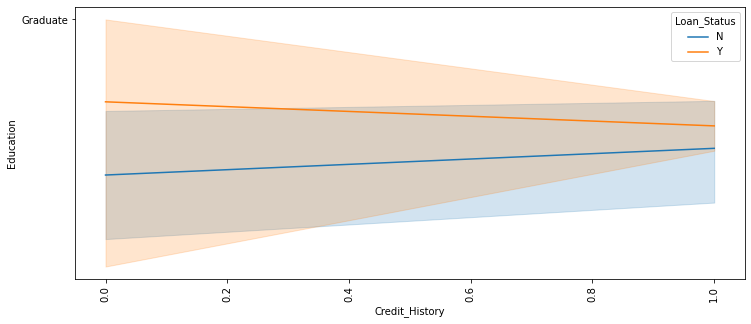

In [28]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.lineplot(x=i,y='Education',data=df,hue='Loan_Status')
    plt.xticks(rotation=90)
    plt.show()

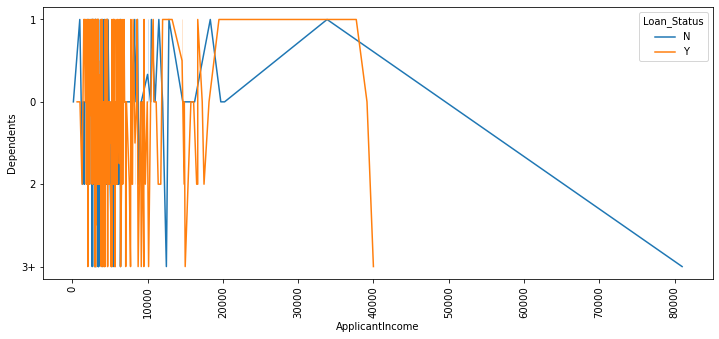

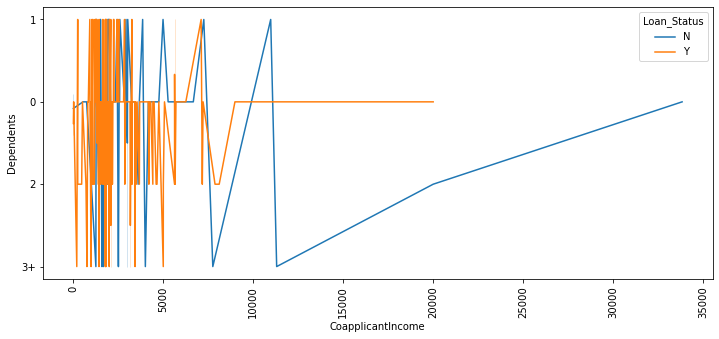

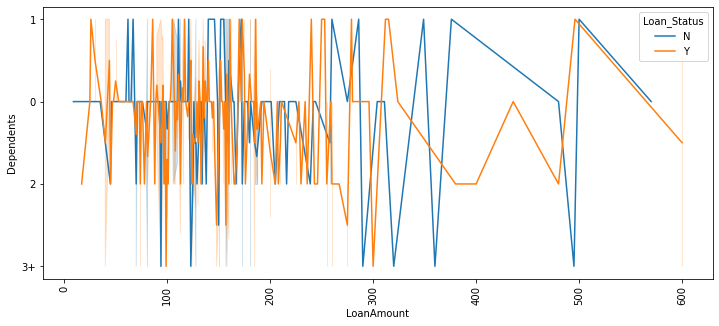

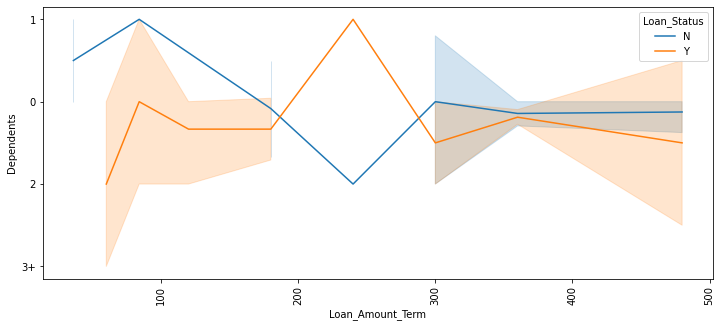

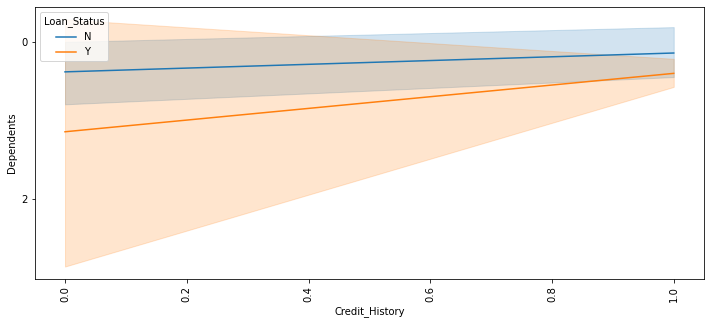

In [29]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.lineplot(x=i,y='Dependents',data=df,hue='Loan_Status')
    plt.xticks(rotation=90)
    plt.show()

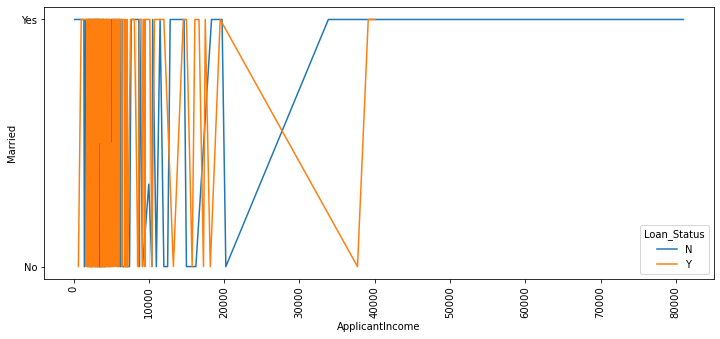

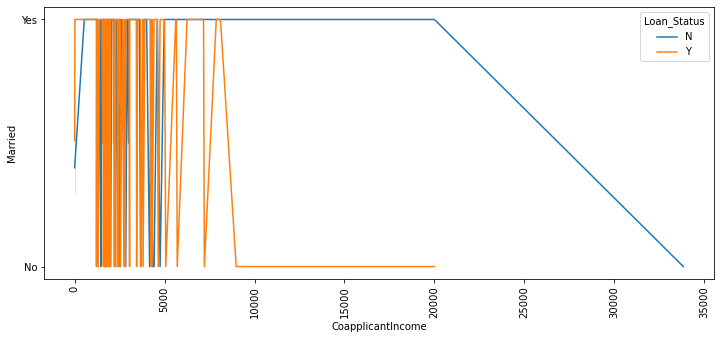

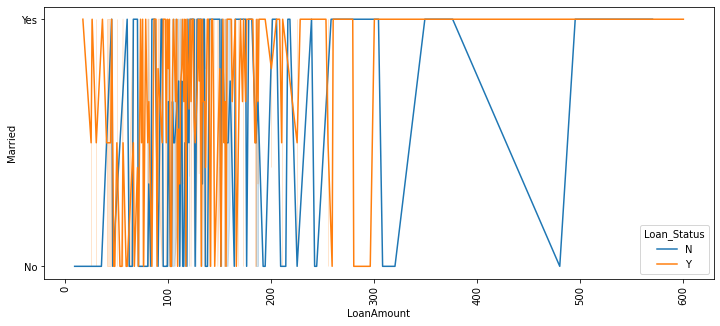

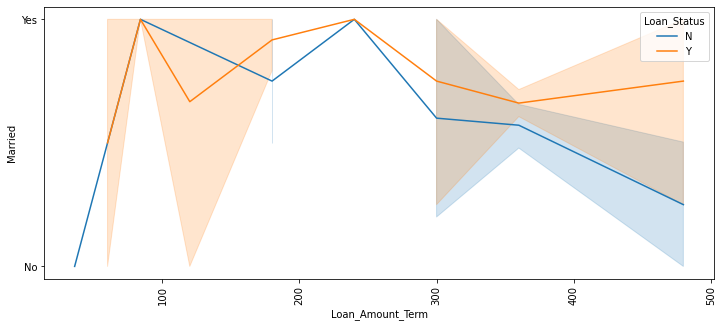

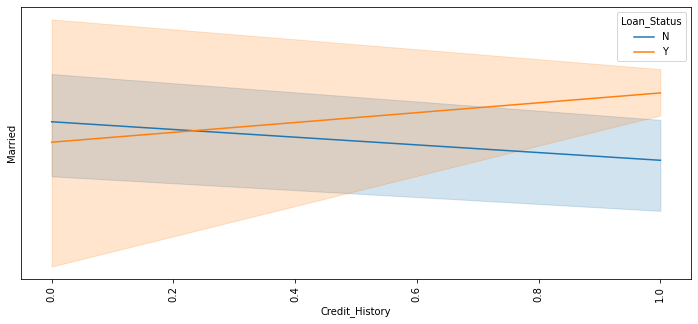

In [30]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.lineplot(x=i,y='Married',data=df,hue='Loan_Status')
    plt.xticks(rotation=90)
    plt.show()

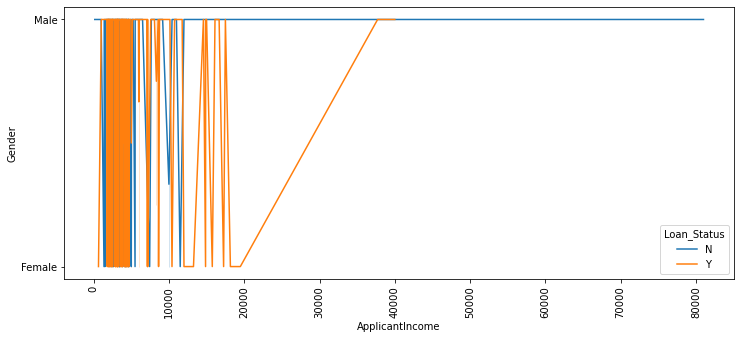

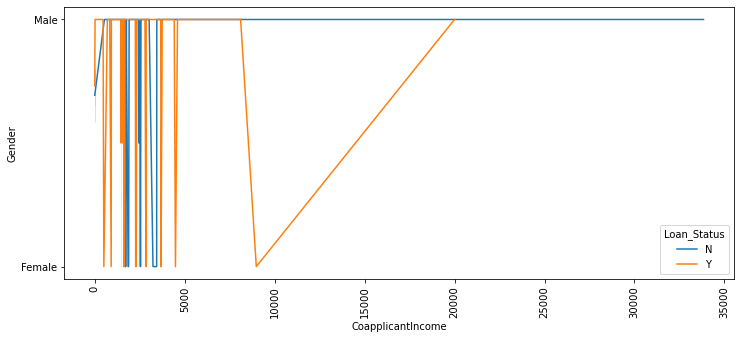

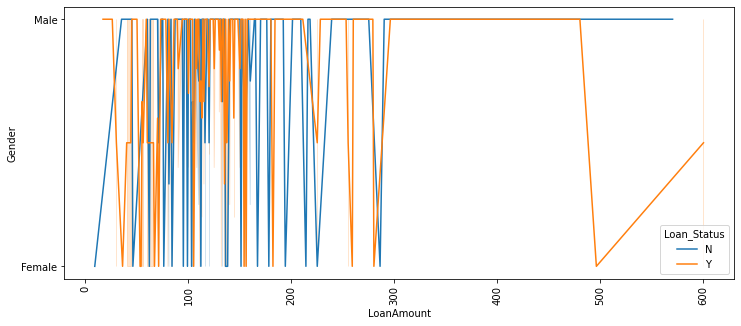

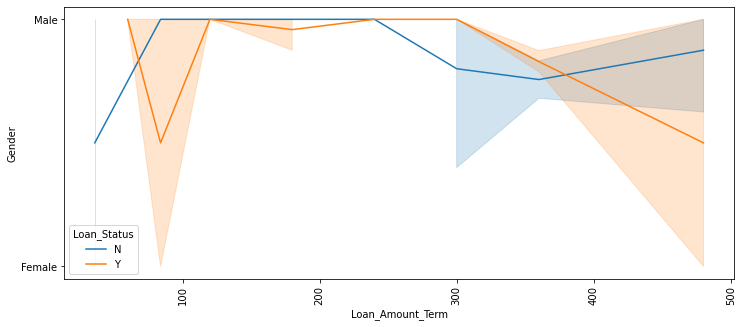

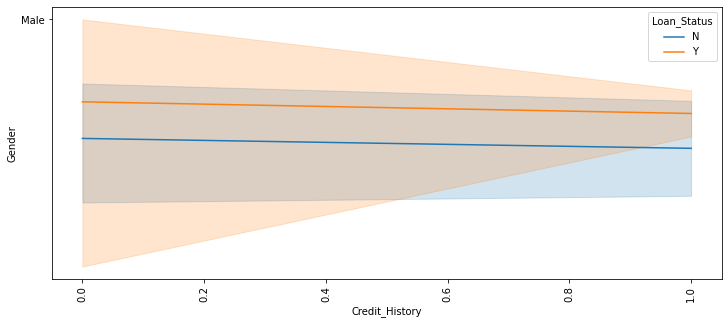

In [31]:
# Lineplot

for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.lineplot(x=i,y='Gender',data=df,hue='Loan_Status')
    plt.xticks(rotation=90)
    plt.show()

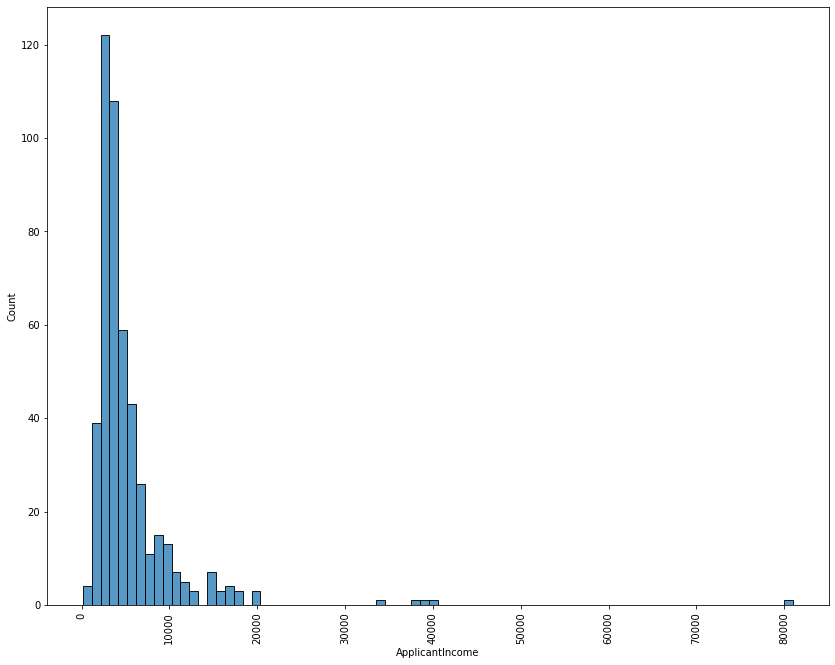

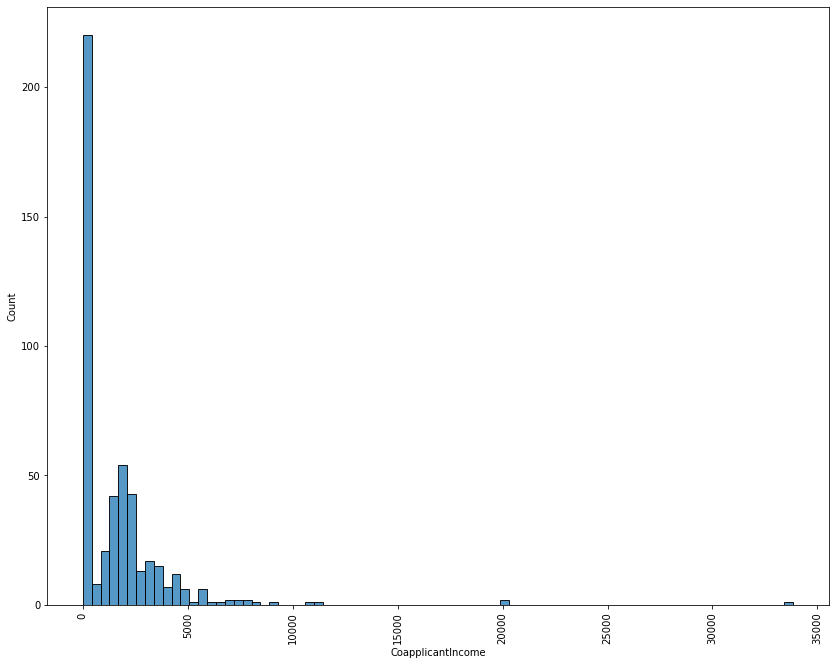

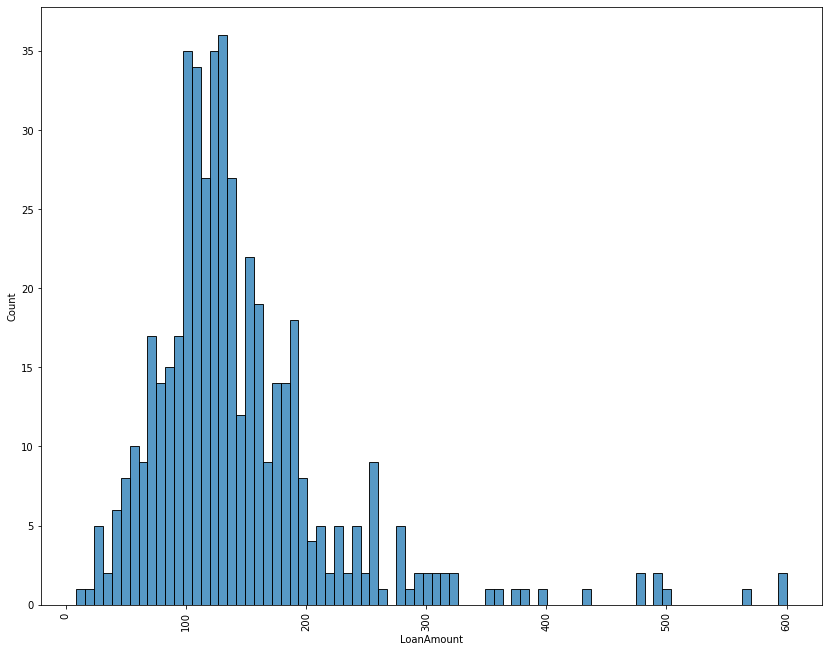

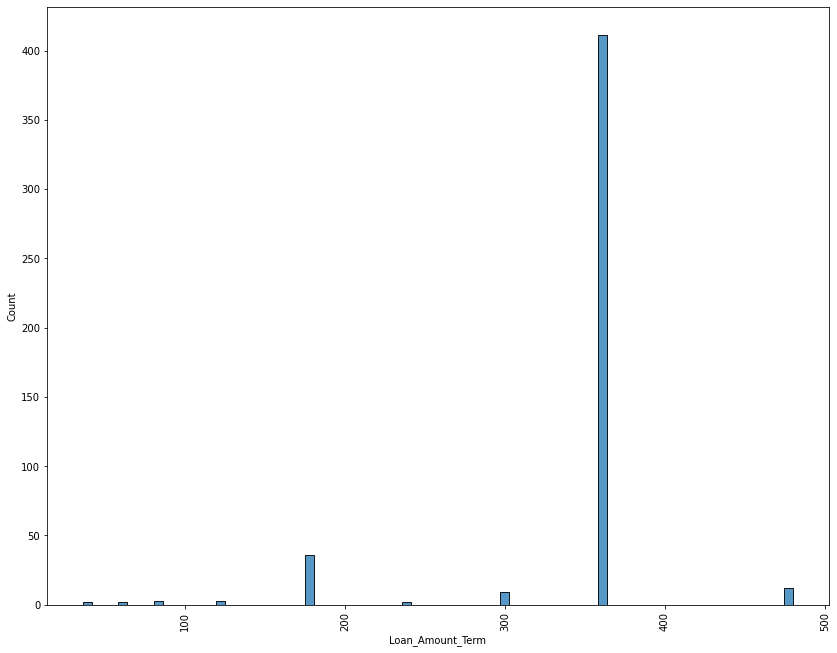

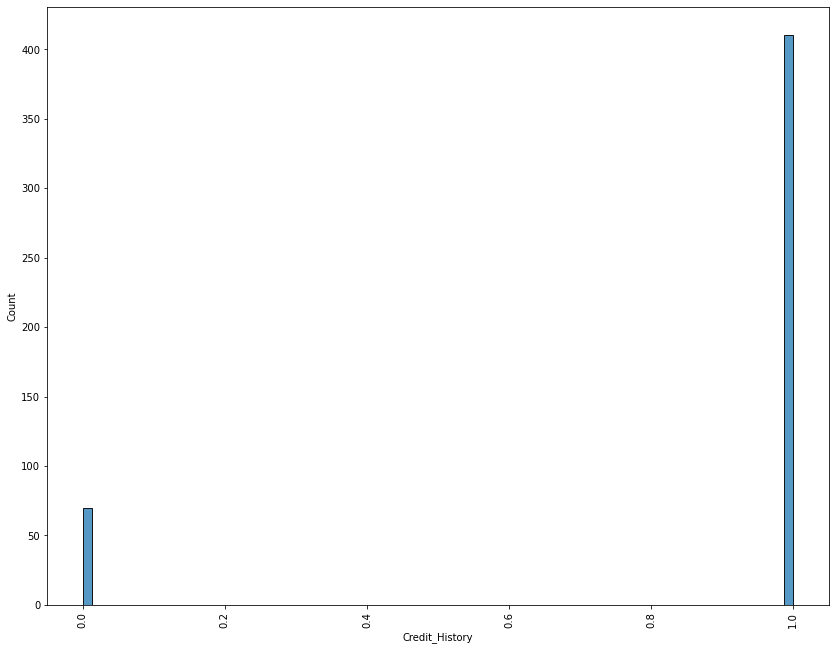

In [32]:
# Histplot:

for i in cont_columns:
    f= plt.figure(figsize=(14,11))
    ax = sns.histplot(x=df[i],data=df,bins=80)
    plt.xticks(rotation=90)

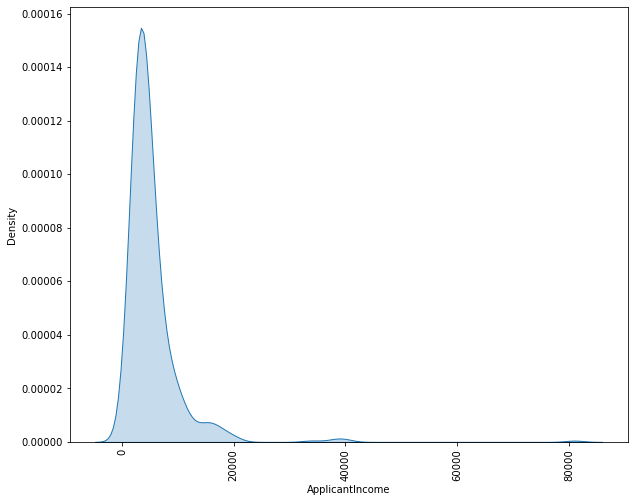

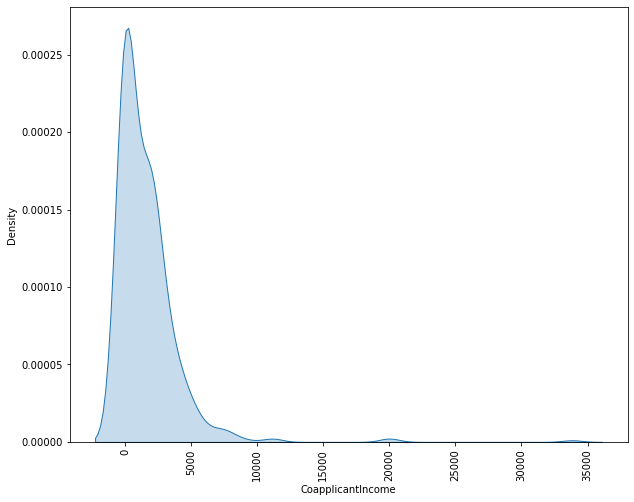

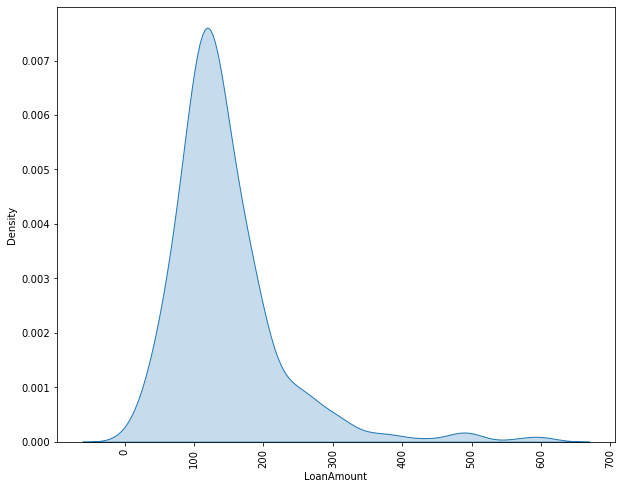

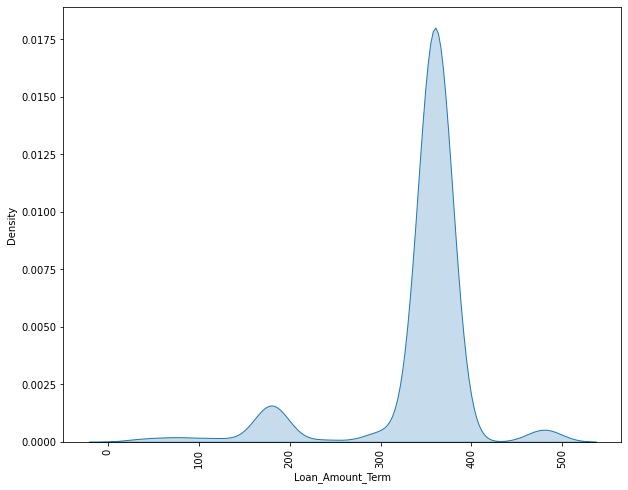

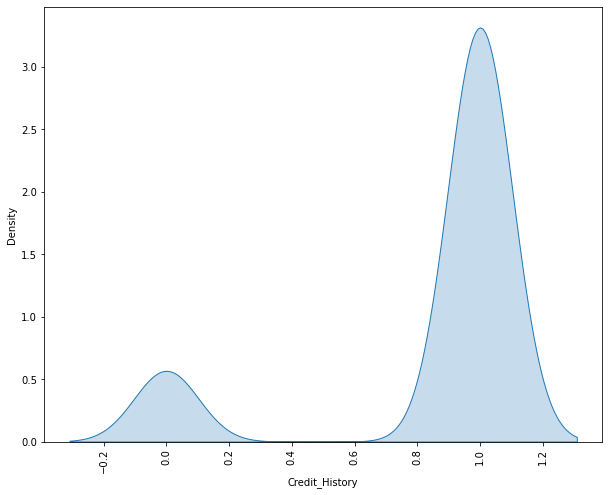

In [33]:
# DEnsity plot

for i in cont_columns:
    f= plt.figure(figsize=(10,8))
    ax = sns.kdeplot(x=df[i],data=df,shade=True)
    plt.xticks(rotation=90)

In [34]:
cont_columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [35]:
cat_columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Figure size 864x360 with 0 Axes>

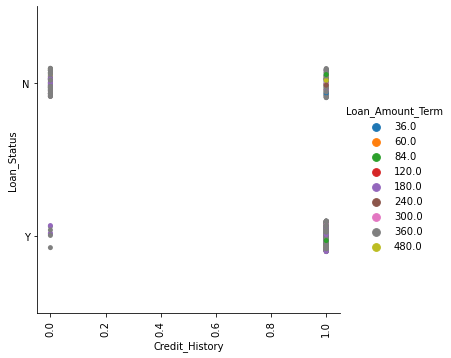

In [36]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='Credit_History',y='Loan_Status',data=df,hue='Loan_Amount_Term')
plt.xticks(rotation=90)
plt.show()

<Figure size 864x360 with 0 Axes>

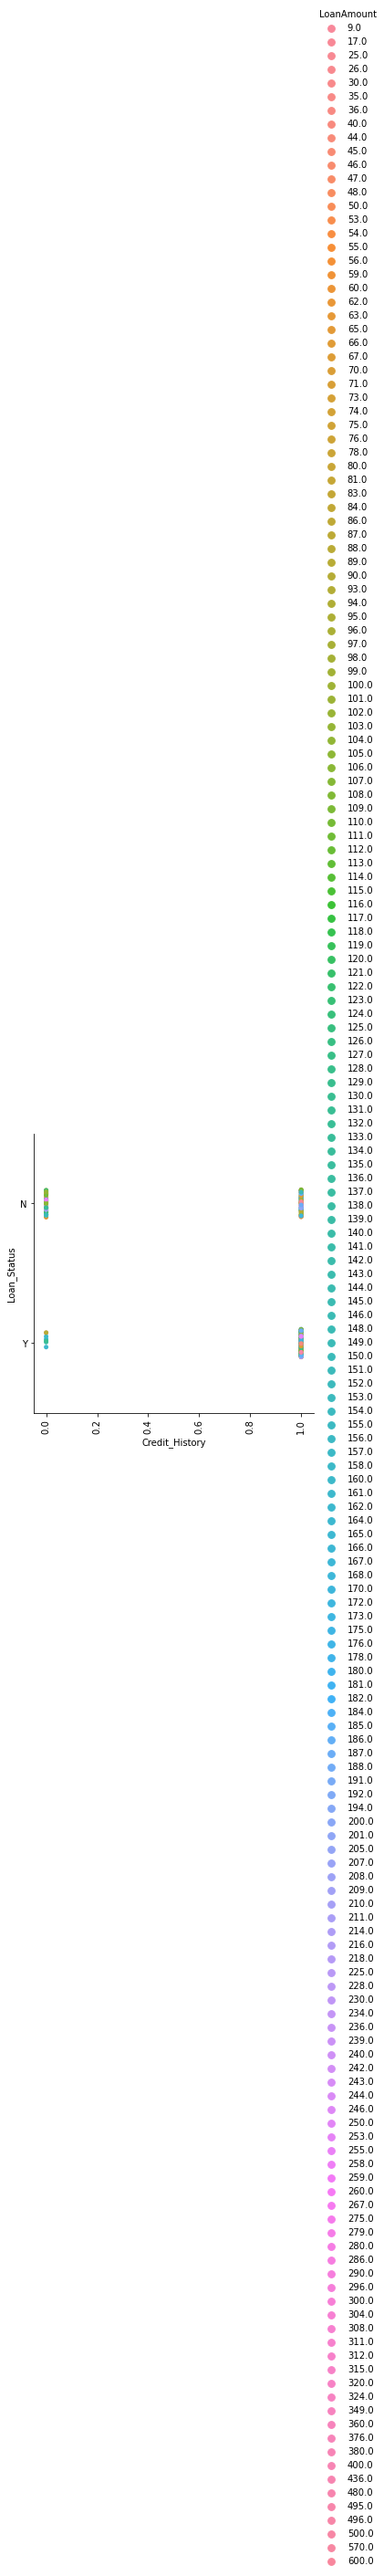

In [37]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='Credit_History',y='Loan_Status',data=df,hue='LoanAmount')
plt.xticks(rotation=90)
plt.show()

<Figure size 864x360 with 0 Axes>

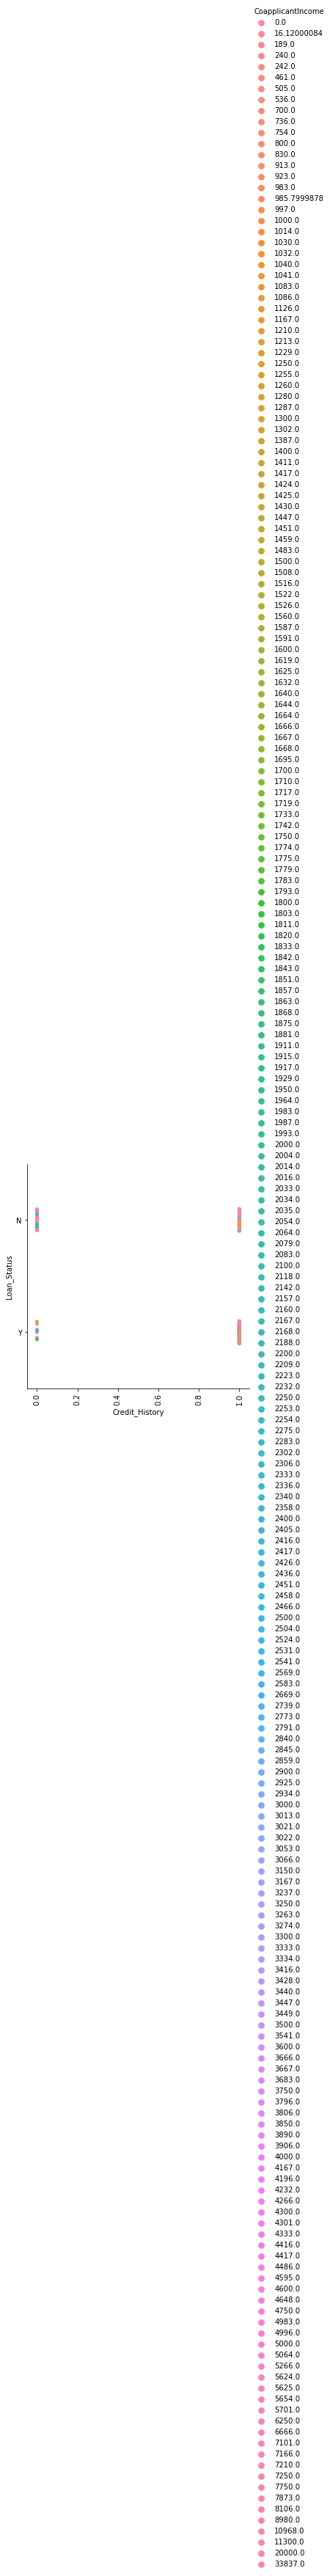

In [38]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='Credit_History',y='Loan_Status',data=df,hue='CoapplicantIncome')
plt.xticks(rotation=90)
plt.show()

<Figure size 864x360 with 0 Axes>

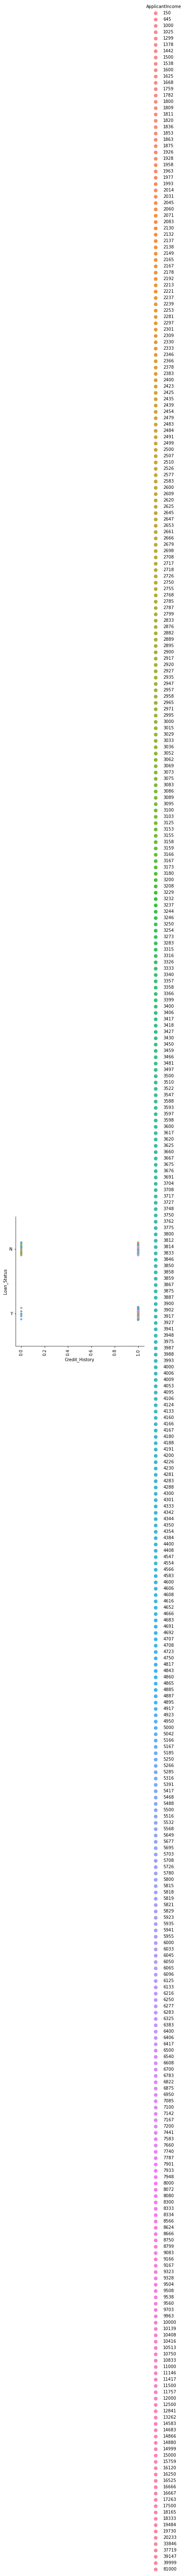

In [39]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='Credit_History',y='Loan_Status',data=df,hue='ApplicantIncome')
plt.xticks(rotation=90)
plt.show()

<Figure size 864x360 with 0 Axes>

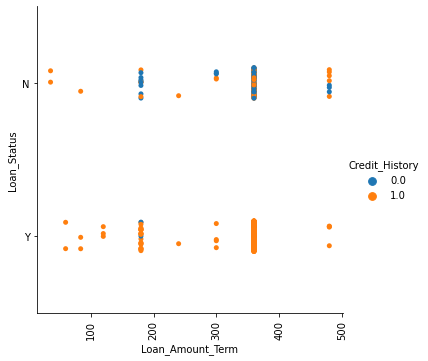

In [40]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='Loan_Amount_Term',y='Loan_Status',data=df,hue='Credit_History')
plt.xticks(rotation=90)
plt.show()

<Figure size 864x360 with 0 Axes>

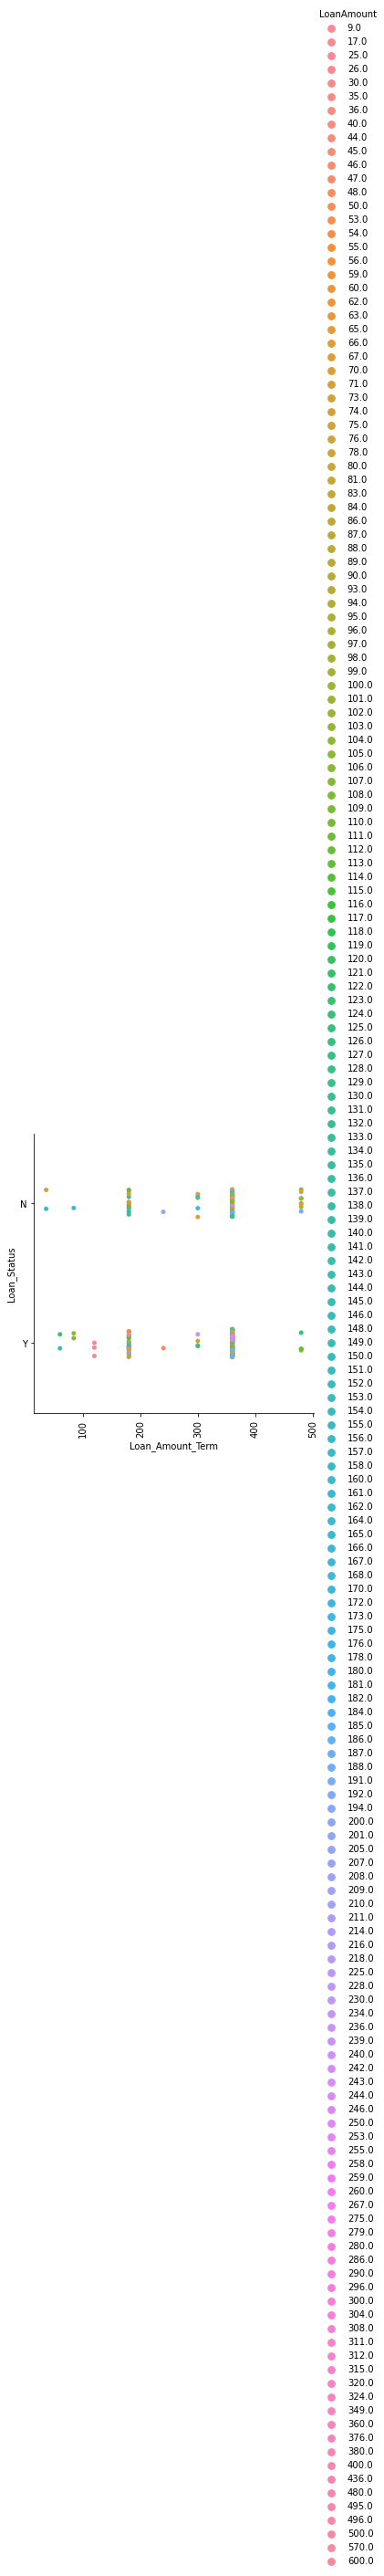

In [41]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='Loan_Amount_Term',y='Loan_Status',data=df,hue='LoanAmount')
plt.xticks(rotation=90)
plt.show()

<Figure size 864x360 with 0 Axes>

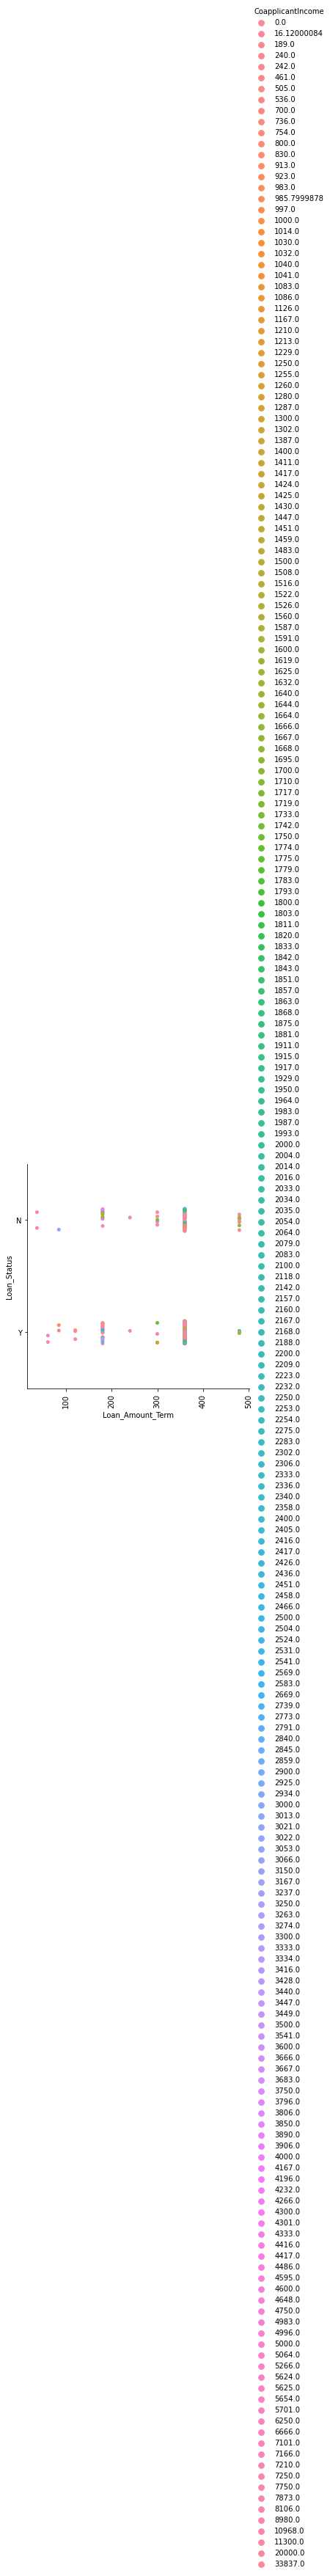

In [42]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='Loan_Amount_Term',y='Loan_Status',data=df,hue='CoapplicantIncome')
plt.xticks(rotation=90)
plt.show()

<Figure size 864x360 with 0 Axes>

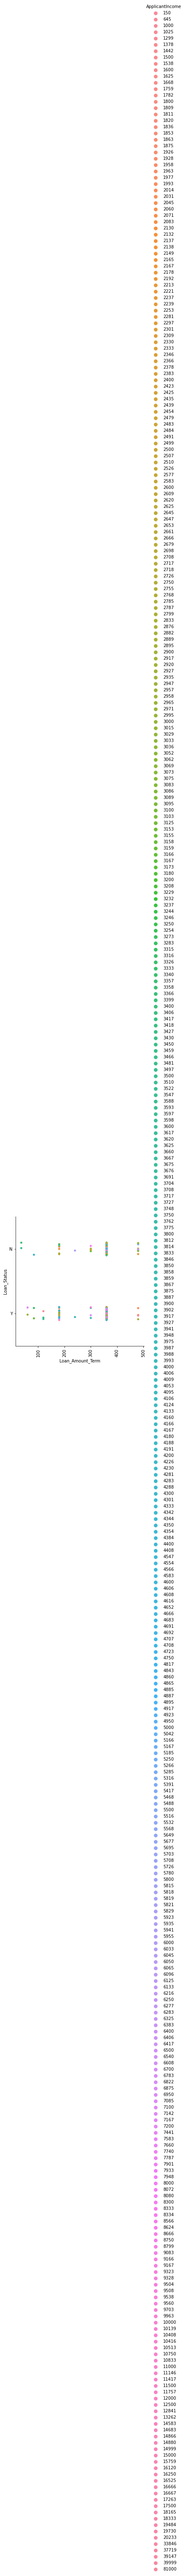

In [43]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='Loan_Amount_Term',y='Loan_Status',data=df,hue='ApplicantIncome')
plt.xticks(rotation=90)
plt.show()

<Figure size 864x360 with 0 Axes>

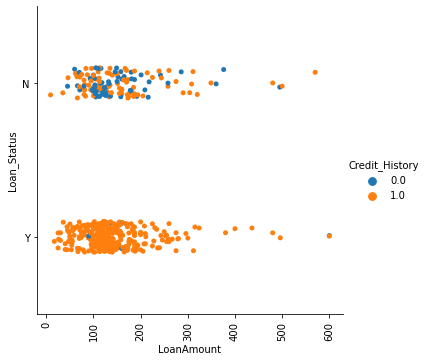

In [44]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='LoanAmount',y='Loan_Status',data=df,hue='Credit_History')
plt.xticks(rotation=90)
plt.show()

<Figure size 864x360 with 0 Axes>

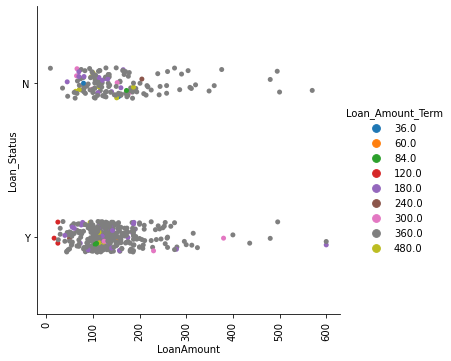

In [45]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='LoanAmount',y='Loan_Status',data=df,hue='Loan_Amount_Term')
plt.xticks(rotation=90)
plt.show()

<Figure size 864x360 with 0 Axes>

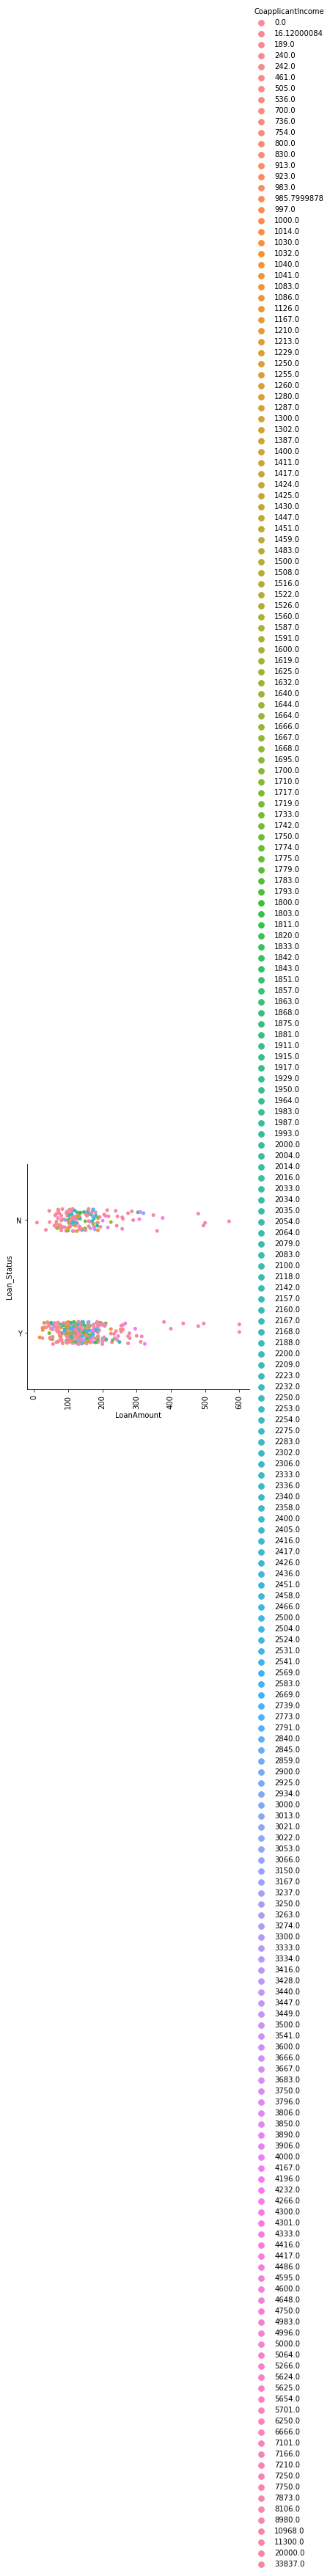

In [46]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='LoanAmount',y='Loan_Status',data=df,hue='CoapplicantIncome')
plt.xticks(rotation=90)
plt.show()

In [ ]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='LoanAmount',y='Loan_Status',data=df,hue='ApplicantIncome')
plt.xticks(rotation=90)
plt.show()

In [ ]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='CoapplicantIncome',y='Loan_Status',data=df,hue='Credit_History')
plt.xticks(rotation=90)
plt.show()

In [ ]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='CoapplicantIncome',y='Loan_Status',data=df,hue='Loan_Amount_Term')
plt.xticks(rotation=90)
plt.show()

In [ ]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='CoapplicantIncome',y='Loan_Status',data=df,hue='LoanAmount')
plt.xticks(rotation=90)
plt.show()

In [ ]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='CoapplicantIncome',y='Loan_Status',data=df,hue='ApplicantIncome')
plt.xticks(rotation=90)
plt.show()

In [ ]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='ApplicantIncome',y='Loan_Status',data=df,hue='Property_Area')
plt.xticks(rotation=90)
plt.show()

In [ ]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='ApplicantIncome',y='Loan_Status',data=df,hue='Self_Employed')
plt.xticks(rotation=90)
plt.show()

In [ ]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='ApplicantIncome',y='Loan_Status',data=df,hue='Education')
plt.xticks(rotation=90)
plt.show()

In [ ]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='ApplicantIncome',y='Loan_Status',data=df,hue='Dependents')
plt.xticks(rotation=90)
plt.show()

In [ ]:
f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='ApplicantIncome',y='Loan_Status',data=df,hue='Married')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Catplots

f= plt.figure(figsize=(12,5))
ax = sns.catplot(x='ApplicantIncome',y='Loan_Status',data=df,hue='Gender')
plt.xticks(rotation=90)
plt.show()

In [ ]:
cat_columns

In [ ]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.swarmplot(x=i,y='Loan_Status',data=df,hue='Property_Area')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.swarmplot(x=i,y='Loan_Status',data=df,hue='Self_Employed')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.swarmplot(x=i,y='Loan_Status',data=df,hue='Education')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.swarmplot(x=i,y='Loan_Status',data=df,hue='Dependents')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.swarmplot(x=i,y='Loan_Status',data=df,hue='Married')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# Swarmplot

for i in cont_columns:
    f= plt.figure(figsize=(12,5))
    ax = sns.swarmplot(x=i,y='Loan_Status',data=df,hue='Gender')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
sns.pairplot(df)

In [ ]:
len(cont_columns)

In [ ]:
# Checking the distribution of continuous variables:

plt.figure(figsize=(20,15),facecolor='skyblue')
plotnumber = 1
for column in cont_data.columns:
    if plotnumber <= 5:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(cont_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

In [ ]:
# Lets remove outliers and check the score:

plt.figure(figsize=(20,25),facecolor='skyblue')
plotnumber = 1
for col in df[cont_columns]:
    if plotnumber <= 5:
        ax = plt.subplot(2,3,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnumber += 1
plt.show()

In [ ]:
# Checking skewness values:

df.skew().sort_values()

In [ ]:
# Using label encoder to encode dependent variable column:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Loan_Status']= label_encoder.fit_transform(df['Loan_Status'])
  
df['Loan_Status'].unique()

In [ ]:
# Using Z Statistics to check and remove any more outliers:

from scipy.stats import zscore

z_score = zscore(df[cont_columns])

abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1) # values lying in 3 times std will be removed

df = df[filtering_entry]

df.describe()

In [ ]:
480-452
# 28 outliers deleted

In [ ]:
28/480*100
# 5.83 % outliers of total data deleted

In [ ]:
df.skew().sort_values()

In [ ]:
# Correlation between features and label:

# Replacing attrition column values:

df.drop(columns = 'Loan_Status',axis = 1).corrwith(df.Loan_Status).plot(kind='bar',grid=True,figsize=(10,7),title='corelation between features and labels')
plt.show()

In [ ]:
df_corr = df.corr().abs()
plt.figure(figsize=(25,22))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})
plt.show()

In [ ]:
df.columns

In [ ]:
df.drop('LoanAmount',axis=1,inplace=True)

In [ ]:
cont_columns

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df[['ApplicantIncome', 'CoapplicantIncome','Credit_History',
       'Loan_Amount_Term']],i) for i in range(df[['ApplicantIncome', 'CoapplicantIncome','Loan_Amount_Term','Credit_History']].shape[1])]
vif['features'] = df[['ApplicantIncome', 'CoapplicantIncome','Loan_Amount_Term','Credit_History']].columns
vif


In [ ]:
# Splitting data into features and label:

y = df['Loan_Status']
X = df.drop('Loan_Status',axis=1)

In [ ]:
X_dummies = pd.get_dummies(X)

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

X_trans_cl = pt.fit_transform(X_dummies)

In [ ]:
from sklearn.decomposition import PCA
# Using PCA i.e. Principal Component Analysis that is a diamensionallity reduction technique:

pca1 = PCA()
pca1.fit_transform(X_trans_cl)

In [ ]:
X_trans_cl.shape

In [ ]:
# Using Scree Plot to identify best components:

plt.figure()
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()


In [ ]:
pca1 = PCA(n_components=420)
new_pcomp = pca1.fit_transform(X_trans_cl)
princi_comp = pd.DataFrame(new_pcomp)
princi_comp

In [ ]:
"""from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(princi_comp,i) for i in range(princi_comp.shape[1])]
vif['features'] = princi_comp.columns
vif
"""

In [ ]:
# Using SelectKBest feature selection method: # It is one of the feature selection method:
# when there are lot of features and you cant graphically analyse , short way , selectKbest can be
# used:

from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest uses f_classif function to select best features where f_classif uses ANOVA test

In [ ]:
best_features = SelectKBest(score_func = f_classif,k = 400)
fit = best_features.fit(princi_comp,y)

data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(princi_comp.columns)

features_score = pd.concat([data_columns,data_scores],axis=1)

features_score.columns = ['Features','Scores']
print(features_score.nlargest(350,'Scores'),'\n') # print 100 best features

# Here we are getting top 80 features we got based on f_classify that uses ANOVA test of statistics.

In [ ]:
"""
EDA steps:

1. Number of rows and columns (614, 13)

2. Column names: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
       
3. Datatypes:

Numerical columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object'

Categorical columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']

4. Null values: 134 rows with 13 columns contain null values.
    
   Counts are mentioned below:
    
    Credit_History       50
    Self_Employed        32
    LoanAmount           22
    Dependents           15
    Loan_Amount_Term     14
    Gender               13
    Married               3
    Loan_ID               0
    Education             0
    ApplicantIncome       0
    CoapplicantIncome     0
    Property_Area         0
    Loan_Status           0

5. Dropping null values.

6. Numerical data description:

Min Applicant income is 150 thats unrealistic
Min Coapplicant income is 0
Min loan amount is 9 that is fishy.
Min credit history is 0.
Range of Loan_Amount_Term is varrying a lot with mean at 342 and min at 36 and max at 480.

7. Categorical data statistics:

For Loan_ID , most frequent value is:  ModeResult(mode=array(['LP001003'], dtype=object), count=array([1])) 

For Gender , most frequent value is:  ModeResult(mode=array(['Male'], dtype=object), count=array([394])) 

For Married , most frequent value is:  ModeResult(mode=array(['Yes'], dtype=object), count=array([311])) 

For Dependents , most frequent value is:  ModeResult(mode=array(['0'], dtype=object), count=array([274])) 

For Education , most frequent value is:  ModeResult(mode=array(['Graduate'], dtype=object), count=array([383])) 

For Self_Employed , most frequent value is:  ModeResult(mode=array(['No'], dtype=object), count=array([414])) 

For Property_Area , most frequent value is:  ModeResult(mode=array(['Semiurban'], dtype=object), count=array([191])) 

For Loan_Status , most frequent value is:  ModeResult(mode=array(['Y'], dtype=object), count=array([332])) 

For column Loan_ID count of unique values are:  480 

For column Gender unique values are:  ['Male' 'Female']
For column Gender count of unique values are:  2 


For column Married unique values are:  ['Yes' 'No']
For column Married count of unique values are:  2 


For column Dependents unique values are:  ['1' '0' '2' '3+']
For column Dependents count of unique values are:  4 


For column Education unique values are:  ['Graduate' 'Not Graduate']
For column Education count of unique values are:  2 


For column Self_Employed unique values are:  ['No' 'Yes']
For column Self_Employed count of unique values are:  2 


For column Property_Area unique values are:  ['Rural' 'Urban' 'Semiurban']
For column Property_Area count of unique values are:  3 


For column Loan_Status unique values are:  ['N' 'Y']
For column Loan_Status count of unique values are:  2 

            ANALYSING VALUE COUNTS:

            For column -- Gender -- value counts are: 
             Male      394
            Female     86
            Dataset contains more male gender data.

            For column -- Married -- value counts are: 
             Yes    311
            No     169
            Name: Married, dtype: int64 
            Dataset has more married people.


            For column -- Dependents -- value counts are: 
             0     274
            2      85
            1      80
            3+     41
            Name: Dependents, dtype: int64 
            Dataset contains more people who dont have any dependents.


            For column -- Education -- value counts are: 
             Graduate        383
            Not Graduate     97
            Name: Education, dtype: int64 
            Most people are graduates.

            For column -- Self_Employed -- value counts are: 
             No     414
            Yes     66
            Name: Self_Employed, dtype: int64 
            Most people are not self employed.

            For column -- Property_Area -- value counts are: 
             Semiurban    191
            Urban        150
            Rural        139
            Name: Property_Area, dtype: int64 
            Mostly applicants live in urban but ratio is slightly imbalanced.


            For column -- Loan_Status -- value counts are: 
             Y    332
            N    148
            Name: Loan_Status, dtype: int64 
            For most people loan status was yes.

9. Countplot complies to above observations.

10. Scatterplot Conclusions:

Mostly applicant income are between 10000-20000
Coaplicant income lies btw 0 to 5000
Loan amount values are between 0 to 200
Loan amount term has max datapoints at 200 and 350 around.
Data points for credit history lie at 0 and 1

11. Analysing line plot:

Conclusions:

Property_Area values , 
For rural people loan status is no even for high applicant income data.
For semiurban people loan status is yes upto income 40000
For semiurban coaplicants loan status is yes varied coap. income.
For people belonging to semi urban and urban are loan status is yes for varrying terms and loan amuont.


For self employed people:
Loan status is yes for applicant income upto 40000 and no for arround 17000
Loan status is yes for coaplicant income upto 20000 and no for 7000 around.
When self employed loan status is no, for all credit history values and yes with -ive trend when for all credit history values.

12. Analysis using histplot and densityplot:

For applicant income frequency is max between: 0-20000
For coapplicant income frequency is max between: 0-5000
For loan amont frequency is max between: 50-200
For loan amont term frequency is max at: 360 around
For credit history frequency is max at: 1

13. Analysing catplots.

We can conclude that:
    loan status is yes when credit history is 1 for most loan amount terms.
    loan status is yes when coapplicant has good income.
    loan status is yes for mostly 360 loan amount term and for varrying loan amount mostly upto 300.
    loan status is yes for mostly high applicant income.
    No conclusive evidence can be found for loan status yes or no whether person self employed or not.
    
14. Analysis using swarmplot:

Conclusion:
    1. status of loan is yes when property area is any and Range is also broader for applicant income as compared to 
    when loan status is no.
    2. status of loan is yes when coaplicant income is good upto 10000.
    3. status of loan is yes for loan amount in range 100-200 for all property types.
    4. Loan term has max data points max when btw 100-200 and 300-400
    5. status of loan is yes for credit history value 1
    6. Mostly loan is granted for working applicants who are not self employed.
    7. Mostly loan is granted for graduates.
    8. Mostly loan is granted for applicants who have 0 dependents.
    9. Mostly loan is granted for applicants who are  married.
    10. Mostly loan is granted for applicants who are males.
    

15. Analysis using lm plot for regression line:
    
    conclusion:
    Slight positive relation can be seen btw applicant,coap. income
    credit history has highest +ive relation
    loan amount has slight -ive relation.
    
    
16. Data distribution:
    
    Except loan amount and loan amount term that are slightly skewed, rest features are highly skewed.
    
17. Outlier detection:

    All features contain outliers.
    
18. Skewness in data: 

    Loan_Amount_Term    -2.362414
    Credit_History      -1.882361
    LoanAmount           2.677552
    ApplicantIncome      6.539513
    CoapplicantIncome    7.491531
    
    All values are skewed.
    
19. Furthur steps:
    Encoding label column.
    Outlier removal : 5.83 % outliers removed.
    Corelation checking and multicolinearity check.
        Credit history is highly correlated with loan status.
        Multicolinearity problem is not found. But still as vif values of credit history and loan amount term
        have values > 5 , they are correlated to each other.
    Encoding categorical features using get dummies.
    Using power transformer to transform data.
    PCA analysis and selecting best features.
    Spliting data and applying oversampling using smote.
        
20. Best model selection and performance: Gradient boosting classifier:

Training accuracy:  100.0
Testing accuracy:  80.21978021978022
Confusion matrix: 
 [[15 16]
 [ 2 58]]
classification report:                precision    recall  f1-score   support

           0       0.88      0.48      0.62        31
           1       0.78      0.97      0.87        60

    accuracy                           0.80        91
   macro avg       0.83      0.73      0.75        91
weighted avg       0.82      0.80      0.78        91


    



    """

In [ ]:
# Splitting our data to training data and testing data
# x_train,x_test,y_train,y_test

X_train,X_test,Y_train,y_test = train_test_split(princi_comp,y,test_size=0.20,random_state=1)

# Here we are keeping training data as our scalled data and testing data as our label or target.

In [ ]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

In [ ]:
print("Before OverSampling, counts of label '1': {} \n".format(sum(Y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

In [ ]:
arr = np.array(y_train_res)

un, co = np.unique(arr,return_counts=True)

dict(zip(un,co))

In [ ]:
# Logistic Regression:

log_reg = LogisticRegression(random_state=10)

log_reg.fit(X_train_res,y_train_res) 

pred_train = log_reg.predict(X_train_res)

y_pred = log_reg.predict(X_test)

acc = accuracy_score(y_test,y_pred)

print('Accuracy report: ',acc)

confusion_mat = confusion_matrix(y_test,y_pred)

print('Confusion matrix: \n',confusion_mat)

clr = classification_report(y_test,y_pred)

print('classification report: ' ,clr)

In [ ]:
# Best result for Decision Tree Classifier:

dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train_res,y_train_res) 
pred_train_dtc = dtc.predict(X_train_res)
y_pred = dtc.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train_res,pred_train_dtc)*100)
print('Testing accuracy: ', acc*100)
confusion_mat = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',confusion_mat)
clr = classification_report(y_test,y_pred)
print('classification report: ' ,clr)

In [ ]:
# Random forrest classifier model:

rfc_f = RandomForestClassifier()
rfc_f.fit(X_train_res,y_train_res) 
pred_train_rfc_f = rfc_f.predict(X_train_res)
y_pred = rfc_f.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train_res,pred_train_rfc_f)*100)
print('Testing accuracy: ', acc*100)
confusion_mat = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',confusion_mat)
clr = classification_report(y_test,y_pred)
print('classification report: ' ,clr)

In [ ]:
# Using best parameters for improved score:

svc = SVC()

svc.fit(X_train_res,y_train_res)

pred_train_svc = svc.predict(X_train_res)
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train_res,pred_train_svc)*100)
print('Testing accuracy: ', acc*100)
confusion_mat = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',confusion_mat)
clr = classification_report(y_test,y_pred)
print('classification report: ' ,clr)

In [ ]:
# KNN classifier:

knn = KNeighborsClassifier()
knn.fit(X_train_res,y_train_res) 
pred_train_knn = knn.predict(X_train_res)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train_res,pred_train_knn)*100)
print('Testing accuracy: ', acc*100)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# GBC

gbdt_clf = GradientBoostingClassifier(random_state=3)
gbdt_clf.fit(X_train_res,y_train_res) 
pred_train_gbdt_clf = gbdt_clf.predict(X_train_res)
y_pred = gbdt_clf.predict(X_test)
acc_gbc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train_res,pred_train_gbdt_clf)*100)
print('Testing accuracy: ', acc*100)
confusion_mat = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',confusion_mat)
clr = classification_report(y_test,y_pred)
print('classification report: ' ,clr)

In [ ]:
acc_gbc

In [ ]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train_res, y_train_res)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)

In [ ]:
# ADA model:
from sklearn.ensemble import AdaBoostClassifier

ada_boosted = AdaBoostClassifier(random_state=1,n_estimators=800,learning_rate=1)
ada_boosted.fit(X_train_res,y_train_res)
yb_pred = ada_boosted.predict(X_test)
pred_train_ada = ada_boosted.predict(X_train_res)
y_pred = ada_boosted.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Training accuracy: ', accuracy_score(y_train_res,pred_train_ada)*100)
print('Testing accuracy: ', acc*100)
confusion_mat = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',confusion_mat)
clr = classification_report(y_test,y_pred)
print('classification report: ' ,clr)

In [ ]:
# Lets plot ROC AUC curve to choose best model:

from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [ ]:
# Lets check ROC AUC Curve for fitted models on training data: (True +ive Rate/False +ive Rate)

disp = plot_roc_curve(dtc,X_train_res,y_train_res)

plot_roc_curve(knn,X_train_res,y_train_res,ax=disp.ax_)

plot_roc_curve(log_reg,X_train_res,y_train_res,ax=disp.ax_)

plot_roc_curve(svc,X_train_res,y_train_res,ax=disp.ax_)

plot_roc_curve(rfc_f,X_train_res,y_train_res,ax=disp.ax_)

plot_roc_curve(ada_boosted,X_train_res,y_train_res,ax=disp.ax_)

plot_roc_curve(gbdt_clf,X_train_res,y_train_res,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

# This result is on training data.

In [ ]:
# Lets check ROC AUC Curve for fitted models on testing data: (True +ive Rate/False +ive Rate)

disp = plot_roc_curve(dtc,X_test,y_test)

plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)

plot_roc_curve(log_reg,X_test,y_test,ax=disp.ax_)

plot_roc_curve(svc,X_test,y_test,ax=disp.ax_)

plot_roc_curve(rfc_f,X_test,y_test,ax=disp.ax_)

plot_roc_curve(ada_boosted,X_test,y_test,ax=disp.ax_)

plot_roc_curve(gbdt_clf,X_test,y_test,ax=disp.ax_)

plt.legend(prop={'size':10},loc='lower right')

plt.show()

# This result is on testing data.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
clf = GridSearchCV(log_reg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_clf = clf.fit(X_train_res,y_train_res)

In [ ]:
best_clf.best_estimator_

In [ ]:
print (f'Accuracy - : {best_clf.score(X_train_res,y_train_res):.3f}')

In [ ]:
print (f'Accuracy - : {best_clf.score(X_test,y_test):.3f}')

In [ ]:
# HYPER PARAMETER TUNING:

# Tuning parameters using GridSearchCV:

params = {'max_depth':range(4,8),
          'min_samples_split':range(2,8,2),
          'learning_rate':np.arange(0.1,0.3)} # at which rate our model should learn

grd = GridSearchCV(gbdt_clf,param_grid=params)

grd.fit(X_train_res,y_train_res)

In [ ]:
grd.best_params_

In [ ]:
# Instantiating gradient boosting classifier:

gbdt_clf_f = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, min_samples_split=4)

# Training the model
gbdt_clf_f.fit(X_train_res,y_train_res)

In [ ]:
# Defining function for model confidence and accuracy:

def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train == True:
        y_pred = clf.predict(x_train)
        print('Train result: ',round(accuracy_score(y_train,y_pred)*100,3),'Percent')
    elif train == False:
        pred = clf.predict(x_test)
        print('Test result: ',round(accuracy_score(y_test,pred)*100,3),'Percent')
        
        print('\n\n Test Classification report: \n\n',classification_report(y_test,pred,digits=2)) ##Model confidence/accuracy


In [ ]:
# Calling metrics function and pass dataset to check train and test score:

metric_score(gbdt_clf_f,X_train_res,X_test,y_train_res,y_test,train=True)

metric_score(gbdt_clf_f,X_train_res,X_test,y_train_res,y_test,train=False)

In [ ]:
# Creating pipeline:

from sklearn.pipeline import Pipeline

pipe1 = Pipeline([('pt',PowerTransformer()),('pca',PCA(n_components=420)),('base_model1',GradientBoostingClassifier())])

pipe1.fit(X_train_res,y_train_res)

y_pred = pipe1.predict(X_test)

accuracy_score(y_test,y_pred)


In [ ]:
# Saving classifier model to pickle string

import pickle 
saved_model1 = pickle.dumps(pipe1) 
pipe_pickle1 = pickle.loads(saved_model1)
pipe_pickle1.predict(X_test) # predicting testing data
